# **Session 3 - Our First DNN**

### Using Keras:
1. Install Keras [Keras is a high-level neural networks API]
2. Import Keras

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


### **Import Libraries and modules**
1. import the basic libraries
2. import libraries required for building up the model using keras
3. import the mnist dataset

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets
Load data from mnist dataset and split the data between training dataset and testing dataset

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

###**Print and Plot**:
1. Print the shape for the trainig dataset
2. Import pyplot for plotting the input image
3. Plot the Input Image

(60000, 28, 28)


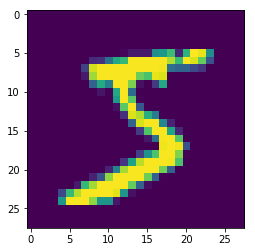

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

###**Reshape**:
1. Reshape the training dateset to 28*28 size with 1 channel.
2. Reshape the testing dateset to 28*28 size with 1 channel.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

###**Type Conversion and Scalling:**
1. Convert the input data type to float32.
2. Normalise the input data within the range of 0 and 9.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

###**Print Y Train:**
1. Print the y train first 10 values

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

###**One Hot Encoding of Labels:**
1. Convert the 1D class arrays of output data into 10 dimesional class matrices - basically one hot encoding.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

###**Print Y Train after encoding:**
1. Print the y train first 10 values

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

##**Model Creation Using Keras**
The following code defines the architecture/model of our neural network in which we will add layers in the network using keras:
1.   **Initializing a sequential model**: Stack layers on top of one another, it also ensures that the input and output sizes of successive layers are compatible. 
2.   **Adding Convolution Layers**: While adding the first convolution layer we need to specify the input size as well. In the next convolution layers we do not need an input size since they will receive the input size from the preceeding layers.
3. **Adding Max Pooling Layers**: We add them to resuce the dimensions of image extracting the maximum out of the (2,2) pool and pass them forward.
4. **Adding Flatten Layer**: When finally we reach the output size of 1X1X10, we flatten the output channel-wise into output of shape 10 (1-dimension).
5. **Adding softmax Layer**: This layer converts the last layer outuput into probabolity distribution of 10 classes.


**Total params**: 19,042

**Trainable params**: 19,042

**Non-trainable params**: 0

In [0]:
from keras.layers import Activation
########################################
model = Sequential()
########################################

# All shapes are in the form [height, width, num_channels]

# INPUT SIZE : [28, 28, 1] | OUTPUT SIZE : [26, 26, 8] | GRF_of_input : [1, 1]
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))

# INPUT SIZE : [26, 26, 8] | OUTPUT SIZE : [24, 24, 16] | GRF_of_input : [3, 3]
model.add(Convolution2D(16, 3, 3, activation='relu'))

# INPUT SIZE : [24, 24, 16] | OUTPUT SIZE : [22, 22, 32] | GRF_of_input : [5, 5]
model.add(Convolution2D(32, 3, 3, activation='relu'))

########################################
# INPUT SIZE : [22, 22, 32] | OUTPUT SIZE : [11, 11, 32] | GRF_of_input : [7, 7]
model.add(MaxPooling2D(pool_size=(2, 2)))
########################################

# INPUT SIZE : [11, 11, 32] | OUTPUT SIZE : [11, 11, 8] | GRF_of_input : [14, 14]
model.add(Convolution2D(8, 1, 1, activation='relu'))

# INPUT SIZE : [11, 11, 8] | OUTPUT SIZE : [9, 9, 16] | GRF_of_input : [14, 14]
model.add(Convolution2D(16, 3, 3, activation='relu'))

# INPUT SIZE : [9, 9, 16] | OUTPUT SIZE : [7, 7, 32] | GRF_of_input : [16, 16]
model.add(Convolution2D(32, 3, 3, activation='relu'))

########################################

# INPUT SIZE : [7, 7, 32] | OUTPUT SIZE : [7, 7, 8] | GRF_of_input : [18, 18]
model.add(Convolution2D(8, 1, 1))

# INPUT SIZE : [7, 7, 8]] | OUTPUT SIZE : [5, 5, 16] | GRF_of_input : [18, 18]
model.add(Convolution2D(16, 3, 3, activation='relu'))

# INPUT SIZE : [5, 5, 16] | OUTPUT SIZE : [3, 3, 24] | GRF_of_input : [20, 20]
model.add(Convolution2D(24, 3, 3))

# INPUT SIZE : [3, 3, 24] | OUTPUT SIZE : [1, 1, 10] | GRF_of_input : [22, 22]
model.add(Convolution2D(10, 3, 3))

########################################
# INPUT SIZE : [1, 1, 10] | OUTPUT SIZE : [10] | GRF_of_input : [24, 24]
model.add(Flatten())
# INPUT SIZE : [10] | OUTPUT SIZE : [10] | GRF_of_input : [24, 24]
model.add(Activation('softmax'))
########################################
model.summary()

W0815 11:24:29.932947 139651244480384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
W0815 11:24:29.954902 139651244480384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0815 11:24:29.958832 139651244480384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: U

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 8)         264       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 16)          1168      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          4640      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launche

**Compiling and calculating the score for the model.**

#**Getting the accuracy value of = 99%**

**Compiling the Model**

Compiling means that the keras will create the computational graph using tensorflow backend. 

For this to happen, we need to provide:
1. **Loss Function:** It is a mathematical function that calculates some sort of differentiable distance measure between the network's output and the actual output for each class. During training, we average out these losses and backpropagate them through the network. In this case - we use categorical cross-entropy.
2. **Optimizer:** Optimizer algorithm manipulates the learning rate per time-step so as to update the weights in a manner that does not lead to a swinging behaviour around the minimum. A few examples are AdaGrad, Momentum etc. but Adam is what is mostly used by everyone.
3. **Accuracy Metric:** This is a metric that measures the performance of the network. In the case of classification this is accuracy (i.e. number_of_correct_predictions / number_of_total_examples_in_batch).

**Training the Model**

We use model.fit for training the model. We pass the training dataset, batch size and number of epochs as parameter to the function.


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Epoch 1/10
60000/60000 [==============================] - 23s 389us/step - loss: 0.2180 - acc: 0.9317
Epoch 2/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.0741 - acc: 0.9776
Epoch 3/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.0568 - acc: 0.9822
Epoch 4/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0458 - acc: 0.9859
Epoch 5/10
60000/60000 [==============================] - 17s 276us/step - loss: 0.0403 - acc: 0.9874
Epoch 6/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.0361 - acc: 0.9886
Epoch 7/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0316 - acc: 0.9897
Epoch 8/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.0290 - acc: 0.9906
Epoch 9/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.0265 - acc: 0.9913
Epoch 10/10
60000/60000 [==============================] - 17s 282us/step - loss: 

Predict values using model and the print actual and predicted value to compare them.

In [0]:
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])

[[7.5200274e-10 3.7035935e-08 5.5623963e-07 7.4952305e-07 6.8869424e-11
  4.6227355e-09 2.2486802e-11 9.9999869e-01 1.0141310e-09 3.6013041e-08]
 [1.3312504e-09 1.3050641e-12 1.0000000e+00 5.9685714e-13 1.2532732e-13
  4.0307130e-16 1.7030549e-10 1.5897280e-13 2.7223837e-13 2.9485826e-17]
 [3.1873808e-09 9.9998248e-01 8.5790889e-06 1.0463620e-09 6.4287315e-06
  3.5382648e-09 1.4440484e-07 1.5221843e-06 7.5765189e-07 4.4304361e-08]
 [9.9999869e-01 7.7526839e-11 5.5882346e-08 1.1563757e-08 3.4375995e-09
  8.9607486e-09 6.9796369e-07 2.8317335e-10 2.9371483e-07 2.0565898e-07]
 [1.0060710e-09 2.0146969e-09 2.5799188e-10 4.1286377e-11 9.9999762e-01
  3.0277700e-10 2.1310521e-08 3.8745421e-10 2.7299652e-08 2.3445643e-06]
 [7.3122275e-10 9.9999011e-01 2.4765832e-06 1.2820582e-10 2.5794568e-06
  4.0413473e-10 6.8540288e-08 4.1308813e-06 5.0251538e-07 4.2478558e-08]
 [4.6189477e-15 2.4420956e-08 3.7735609e-10 8.7594071e-11 9.9998116e-01
  6.8800277e-09 2.1455454e-11 3.4028591e-10 4.9997805e-08 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

Fucnction written for visualising the output from a filter.

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

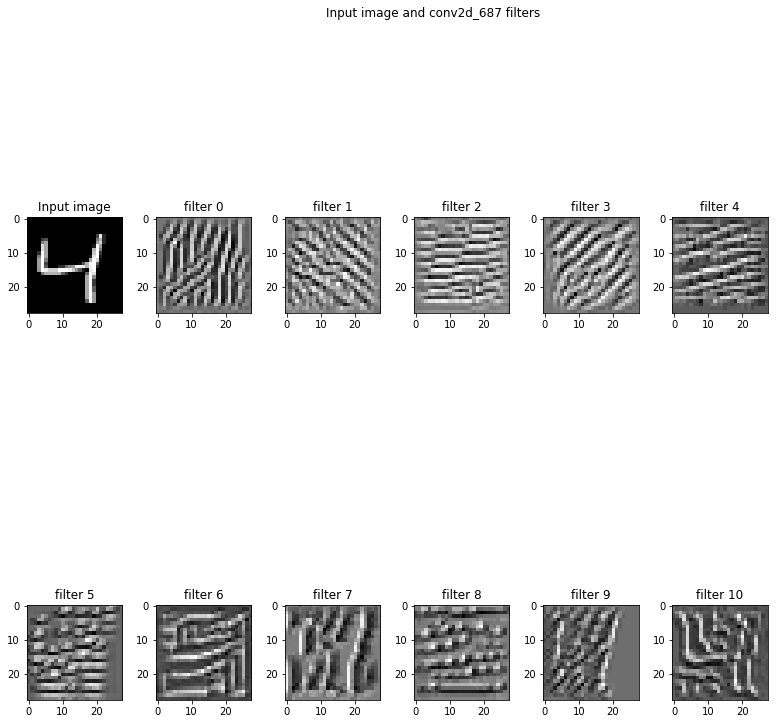

In [0]:
vis_img_in_filter(layer_name='conv2d_687')

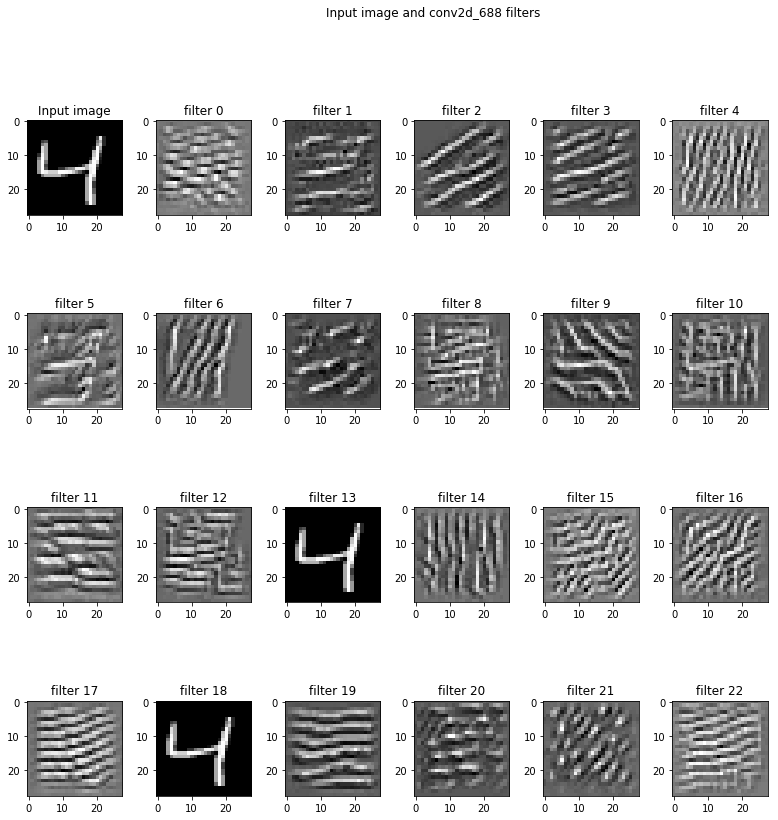

In [0]:
vis_img_in_filter(layer_name='conv2d_688')